# Probability density function analysis


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import re
#from scipy.optimize import curve_fit
#import mdtraj as md
import os

In [3]:
def dir_to_trajs(directory):
    """
    loads atom positions from all LAMMPS files in given directory
    
    input directory: path of directory e.g. run3-100_dumplin (string)
    output: positions of all atoms at different times (numpy array) 
    """
    a = []
    # iterate over files in
    # that directory
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file: 
        if os.path.isfile(f):
            a.append(np.loadtxt(f, skiprows=9, usecols=(1,2,3)))
    return np.asarray(a[-round(len(a)/2):])

In [4]:
def calcDists(directory,gendist,samplesize=10,refatom=None):
    trajs = dir_to_trajs(directory)
    a = []
    
    if refatom == None:
        try:
            refatoms = np.random.choice(range(trajs.shape[1]-gendist), size=samplesize, replace=False)
        except:
            refatoms = range(trajs.shape[1]-gendist)
            print(i for i in refatoms)
        #print(range(trajs.shape[1]-gendist))
        #print(trajs.shape[1], gendist)
        #print(refatoms)
        for atom1 in refatoms:
            temp = trajs[:,atom1]-trajs[:,atom1+gendist]
            a.append(np.linalg.norm(temp, axis=1))
        
    else:
        temp = trajs[:,refatom]-trajs[:,refatom+gendist]
        a.append(np.linalg.norm(temp, axis=1))
    
    distances = np.asarray(a)
    return distances

In [5]:
def plotpdf(directory,gendist,refatom=None,title=None):
    alldistances = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a directory:
        if os.path.isdir(f):
            for file in os.listdir(f):
                dumplin = os.path.join(f, file)
                if os.path.isdir(dumplin):
                    alldistances.append(calcDists(dumplin,gendist,refatom=refatom))
    dists = np.asarray(alldistances).flatten()
    print(dists)
    if title != None:
        plt.title(title)
    elif refatom == None:
        plt.title(r'Distribution of distances in '+directory.split('/')[-1]+' for gendist = '+str(gendist))
    else:
        plt.title(r'Distribution of distances in '+directory.split('/')[-1]+' for gendist = '+str(gendist)+'\n'+'atom No '+str(refatom)+' is the reference')
    plt.xlabel(r'distance $r$')
    plt.ylabel(r'$P(r)$')
    plt.hist(dists, bins=25, density=True)
    #plt.grid()
    plt.tight_layout()
    plt.savefig('../plots/'+'Prvsr_'+directory.split('/')[-1]+'_gendist'+str(gendist)+'_ref'+str(refatom)+'.pdf', format='pdf')
    plt.show()

### Anchoring, 1 wall

A = 20

In [5]:
%%time
directory = '../run6-2000/dumplin_cluster_anchoring_1wall_A20'
gendist = 660
ref = 1
plotpdf(directory,gendist,ref,'PDF of distances between beads 1 and 660, only anchoring and 1 wall')

KeyboardInterrupt: 

A = 7

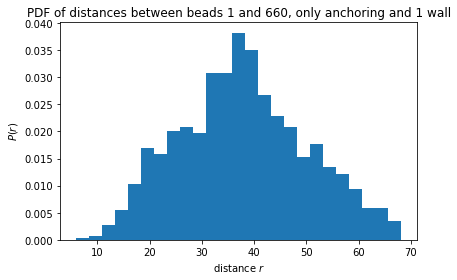

CPU times: user 30.2 s, sys: 2.32 s, total: 32.5 s
Wall time: 32.5 s


In [17]:
%%time
directory = '../run6-2000/dumplin_cluster_anchoring_1wall_A7'
gendist = 600
ref = 1
plotpdf(directory,gendist,ref,'PDF of distances between beads 1 and 660, only anchoring and 1 wall')

### Anchoring, all walls nearby

A = 20

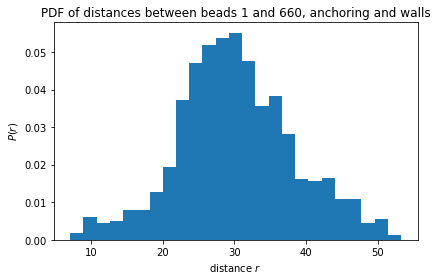

CPU times: user 51.1 s, sys: 615 ms, total: 51.7 s
Wall time: 54.8 s


In [11]:
%%time
directory = '../run6-2000/dumplin_cluster_anchoring_wall_A20'
gendist = 660
ref = 1
plotpdf(directory,gendist,ref,'PDF of distances between beads 1 and 660, anchoring and walls')

A = 6

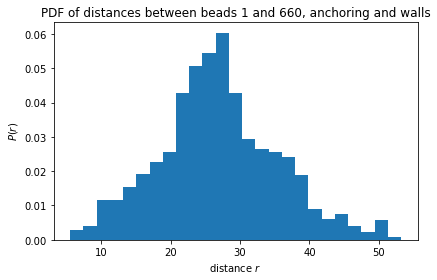

CPU times: user 44.1 s, sys: 386 ms, total: 44.5 s
Wall time: 47.4 s


In [18]:
%%time
directory = '../run6-2000/dumplin_cluster_anchoring_wall_A6'
gendist = 660
ref = 1
plotpdf(directory,gendist,ref,'PDF of distances between beads 1 and 660, anchoring and walls')

### No anchoring, box, size = 50x50x50

A = 20

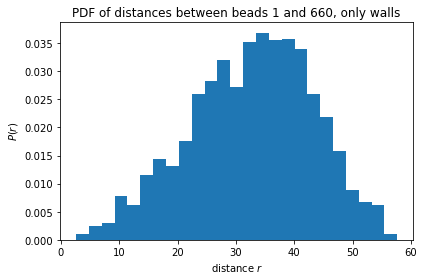

CPU times: user 45.8 s, sys: 459 ms, total: 46.3 s
Wall time: 46.3 s


In [16]:
%%time
directory = '../run6-2000/dumplin_cluster_wall_A20'
gendist = 660
ref = 1
plotpdf(directory,gendist,ref,'PDF of distances between beads 1 and 660, only walls')

### Anchoring, 1 wall, A = 0, 1000 atoms

[33.5776885  35.72996316 27.93484178 ... 33.20914708 20.08950351
 35.62522736]


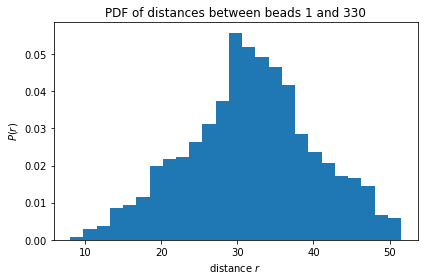

CPU times: user 23.2 s, sys: 377 ms, total: 23.5 s
Wall time: 25.5 s


In [7]:
%%time
directory = '../run2-1000/dumplin_cluster_anchoring_1wall_A0'
gendist = 330
ref = 1
plotpdf(directory,gendist,ref,'PDF of distances between beads '+str(ref)+' and '+str(gendist))

### Anchoring, wall A = 20, 1000 atoms, box size 45

[ 9.91436894 13.11442776 18.14758945 ... 33.90073436 37.56911726
 15.47743471]


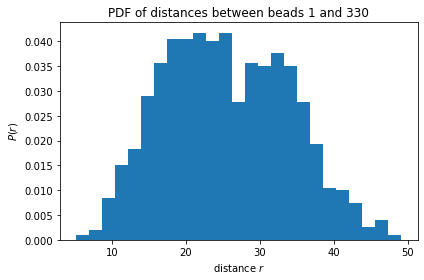

CPU times: user 21.2 s, sys: 283 ms, total: 21.5 s
Wall time: 24.6 s


In [7]:
%%time
directory = '../run2-1000/dumplin_cluster_anchoring_wall'
gendist = 330
ref = 1
plotpdf(directory,gendist,ref,'PDF of distances between beads '+str(ref)+' and '+str(gendist))